In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
result = pd.read_csv('../flood_test_grid.csv')
result = result[result['unreliable'] == True]

result

,nclerk,nservers,unreliable,total_packets,total_put,total_query,duration,servers,rpcs
0,3,3,True,280,130,150,11.1,3,740
2,3,5,True,263,152,111,11.1,5,926
4,3,7,True,202,100,102,12.0,7,1648
6,3,9,True,170,80,90,11.0,9,1605
8,3,11,True,187,83,104,11.1,11,2238
...,...,...,...,...,...,...,...,...,...
328,51,19,True,2056,1031,1025,11.6,19,17070
330,51,21,True,2223,1081,1142,12.5,21,21595
332,51,31,True,1831,941,890,12.6,31,23325
334,51,41,True,1783,897,886,12.2,41,28324


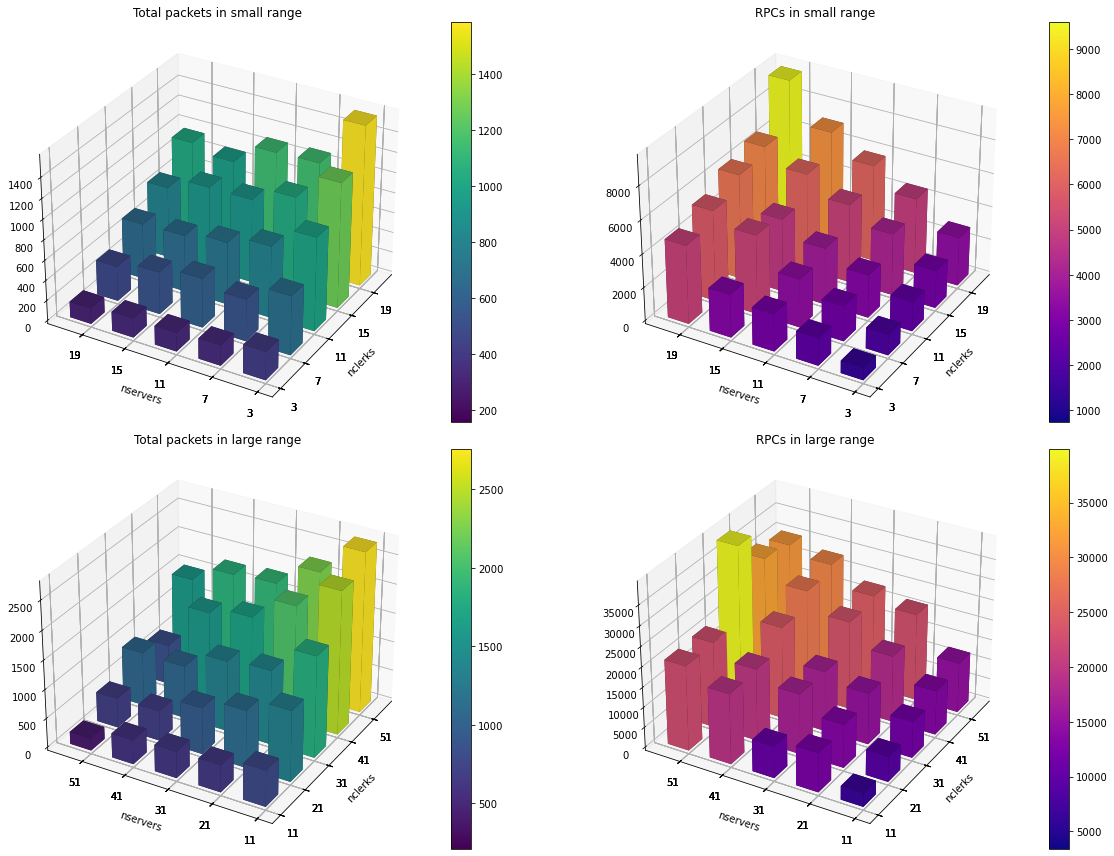

In [26]:
# plot the 3D plot: x is nclerk, y is nservers, and z is total_packets

# set up the figure and axes
fig = plt.figure(figsize=(18, 12))
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')

# filter out the data points that are not in the grid
filtered_result1 = result[(result['nclerk'].isin(range(3, 20, 4))) & (result['nservers'].isin(range(3, 20, 4)))]
filtered_result2 = result[(result['nclerk'].isin(range(11, 52, 10))) & (result['nservers'].isin(range(11, 52, 10)))]

nclerk1 = filtered_result1['nclerk']
nservers1 = filtered_result1['nservers']

nclerk2 = filtered_result2['nclerk']
nservers2 = filtered_result2['nservers']


total_packets1 = filtered_result1['total_packets']
rpcs1 = filtered_result1['rpcs']

total_packets2 = filtered_result2['total_packets']
rpcs2 = filtered_result2['rpcs']

bottom1 = np.zeros_like(total_packets1)
width1 = depth1 = 2
bottom2 = np.zeros_like(total_packets2)
width2 = depth2 = 5

cmap = plt.get_cmap('viridis')
colors = cmap(total_packets1 / max(total_packets1))
ax1.bar3d(nclerk1, nservers1, bottom1, width1, depth1, total_packets1, shade=True, color=colors)
ax1.set_xticks(nclerk1)
ax1.set_yticks(nservers1)
ax1.view_init(30, 210)
ax1.set_title('Total packets in small range')
ax1.set_xlabel('nclerks')
ax1.set_ylabel('nservers')
fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=np.min(total_packets1), vmax=np.max(total_packets1))), ax=ax1, orientation='vertical')

cmap = plt.get_cmap('plasma')
colors = cmap(rpcs1 / max(rpcs1))
ax2.bar3d(nclerk1, nservers1, bottom1, width1, depth1, rpcs1, shade=True, color=colors)
ax2.set_xticks(nclerk1)
ax2.set_yticks(nservers1)
ax2.view_init(30, 210)
ax2.set_title('RPCs in small range')
ax2.set_xlabel('nclerks')
ax2.set_ylabel('nservers')
fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=np.min(rpcs1), vmax=np.max(rpcs1))), ax=ax2, orientation='vertical')

cmap = plt.get_cmap('viridis')
colors = cmap(total_packets2 / max(total_packets2))
ax3.bar3d(nclerk2, nservers2, bottom2, width2, depth2, total_packets2, shade=True, color=colors)
ax3.set_xticks(nclerk2)
ax3.set_yticks(nservers2)
ax3.view_init(30, 210)
ax3.set_title('Total packets in large range')
ax3.set_xlabel('nclerks')
ax3.set_ylabel('nservers')
fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=np.min(total_packets2), vmax=np.max(total_packets2))), ax=ax3, orientation='vertical')

cmap = plt.get_cmap('plasma')
colors = cmap(rpcs2 / max(rpcs2))
ax4.bar3d(nclerk2, nservers2, bottom2, width2, depth2, rpcs2, shade=True, color=colors)
ax4.set_xticks(nclerk2)
ax4.set_yticks(nservers2)
ax4.view_init(30, 210)
ax4.set_title('RPCs in large range')
ax4.set_xlabel('nclerks')
ax4.set_ylabel('nservers')
fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=np.min(rpcs2), vmax=np.max(rpcs2))), ax=ax4, orientation='vertical')
plt.tight_layout()
plt.show()

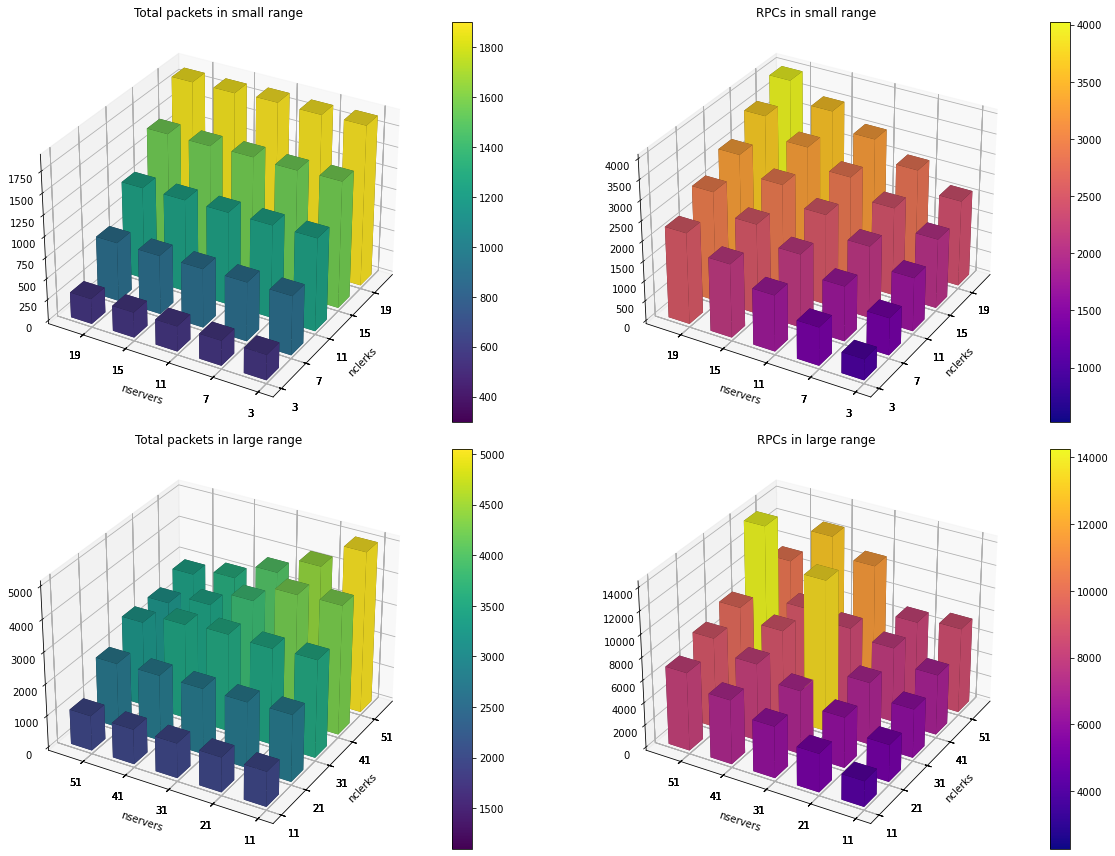

In [27]:
result = pd.read_csv('../flood_test_grid.csv')
result_reliable = result[result['unreliable'] == False]
# plot the 3D plot: x is nclerk, y is nservers, and z is total_packets

# set up the figure and axes
fig = plt.figure(figsize=(18, 12))
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')

# filter out the data points that are not in the grid
filtered_result1 = result_reliable[(result_reliable['nclerk'].isin(range(3, 20, 4))) & (result_reliable['nservers'].isin(range(3, 20, 4)))]
filtered_result2 = result_reliable[(result_reliable['nclerk'].isin(range(11, 52, 10))) & (result_reliable['nservers'].isin(range(11, 52, 10)))]

nclerk1 = filtered_result1['nclerk']
nservers1 = filtered_result1['nservers']

nclerk2 = filtered_result2['nclerk']
nservers2 = filtered_result2['nservers']


total_packets1 = filtered_result1['total_packets']
rpcs1 = filtered_result1['rpcs']

total_packets2 = filtered_result2['total_packets']
rpcs2 = filtered_result2['rpcs']

bottom1 = np.zeros_like(total_packets1)
width1 = depth1 = 2
bottom2 = np.zeros_like(total_packets2)
width2 = depth2 = 5

cmap = plt.get_cmap('viridis')
colors = cmap(total_packets1 / max(total_packets1))
ax1.bar3d(nclerk1, nservers1, bottom1, width1, depth1, total_packets1, shade=True, color=colors)
ax1.set_xticks(nclerk1)
ax1.set_yticks(nservers1)
ax1.view_init(30, 210)
ax1.set_title('Total packets in small range')
ax1.set_xlabel('nclerks')
ax1.set_ylabel('nservers')
fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=np.min(total_packets1), vmax=np.max(total_packets1))), ax=ax1, orientation='vertical')

cmap = plt.get_cmap('plasma')
colors = cmap(rpcs1 / max(rpcs1))
ax2.bar3d(nclerk1, nservers1, bottom1, width1, depth1, rpcs1, shade=True, color=colors)
ax2.set_xticks(nclerk1)
ax2.set_yticks(nservers1)
ax2.view_init(30, 210)
ax2.set_title('RPCs in small range')
ax2.set_xlabel('nclerks')
ax2.set_ylabel('nservers')
fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=np.min(rpcs1), vmax=np.max(rpcs1))), ax=ax2, orientation='vertical')

cmap = plt.get_cmap('viridis')
colors = cmap(total_packets2 / max(total_packets2))
ax3.bar3d(nclerk2, nservers2, bottom2, width2, depth2, total_packets2, shade=True, color=colors)
ax3.set_xticks(nclerk2)
ax3.set_yticks(nservers2)
ax3.view_init(30, 210)
ax3.set_title('Total packets in large range')
ax3.set_xlabel('nclerks')
ax3.set_ylabel('nservers')
fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=np.min(total_packets2), vmax=np.max(total_packets2))), ax=ax3, orientation='vertical')

cmap = plt.get_cmap('plasma')
colors = cmap(rpcs2 / max(rpcs2))
ax4.bar3d(nclerk2, nservers2, bottom2, width2, depth2, rpcs2, shade=True, color=colors)
ax4.set_xticks(nclerk2)
ax4.set_yticks(nservers2)
ax4.view_init(30, 210)
ax4.set_title('RPCs in large range')
ax4.set_xlabel('nclerks')
ax4.set_ylabel('nservers')
fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=np.min(rpcs2), vmax=np.max(rpcs2))), ax=ax4, orientation='vertical')
plt.tight_layout()
plt.show()

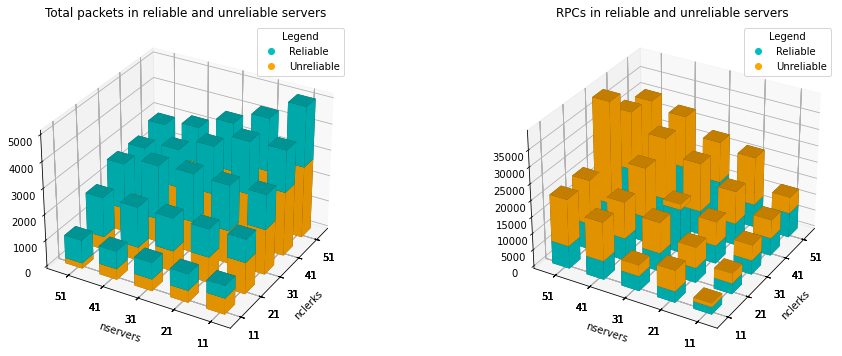

In [28]:
import matplotlib as mpl
result = pd.read_csv('../flood_test_grid.csv')
result_reliable = result[result['unreliable'] == False]
result_unreliable = result[result['unreliable'] == True]

# set up the figure and axes
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# filter out the data points that are not in the grid

result_reliable_filtered = result_reliable[(result_reliable['nclerk'].isin(range(11, 52, 10))) & (result_reliable['nservers'].isin(range(11, 52, 10)))]
result_unreliable_filtered = result_unreliable[(result_unreliable['nclerk'].isin(range(11, 52, 10))) & (result_unreliable['nservers'].isin(range(11, 52, 10)))]

nclerk_reliable = result_reliable_filtered['nclerk']
nservers_reliable = result_reliable_filtered['nservers']
total_packets_reliable = result_reliable_filtered['total_packets']
rpcs_reliable = result_reliable_filtered['rpcs']

nclerk_unreliable = result_unreliable_filtered['nclerk']
nservers_unreliable = result_unreliable_filtered['nservers']
total_packets_unreliable = result_unreliable_filtered['total_packets']
rpcs_unreliable = result_unreliable_filtered['rpcs']


bottom_reliable = np.zeros_like(total_packets_reliable)
bottom_unreliable1 = np.zeros_like(total_packets_unreliable)
width = depth = 5



total_packets_difference = [a-b for a,b in zip(total_packets_reliable.tolist(),total_packets_unreliable.tolist())]
ax1.bar3d(nclerk_unreliable-2, nservers_unreliable-2, np.zeros_like(total_packets_unreliable), width, depth, total_packets_unreliable, shade=True, color='orange',alpha=1)
ax1.bar3d(nclerk_unreliable-2, nservers_unreliable-2, total_packets_unreliable, width, depth, total_packets_difference, shade=True, color='c',alpha=1)
ax1.set_xticks(nclerk_reliable)
ax1.set_yticks(nservers_reliable)
ax1.view_init(30, 210)
ax1.set_title('Total packets in reliable and unreliable servers')
ax1.set_xlabel('nclerks')
ax1.set_ylabel('nservers')

colors = ['c', 'orange']
labels = ['Reliable ', 'Unreliable']
legend_lines = [mpl.lines.Line2D([0], [0], linestyle="none", marker='o', c=colors[y]) for y in [0,1]]
ax1.legend(legend_lines, labels, numpoints=1, title='Legend')

rpcs_difference = [b-a for a,b in zip(rpcs_reliable.tolist(),rpcs_unreliable.tolist())]
bottom_unreliable2 = np.zeros_like(rpcs_unreliable)
ax2.bar3d(nclerk_reliable-2, nservers_reliable-2, bottom_reliable, width, depth, rpcs_reliable, shade=True, color='c',alpha=1)
ax2.bar3d(nclerk_unreliable-2, nservers_unreliable-2, rpcs_reliable, width, depth, rpcs_difference, shade=True, color='orange',alpha=1)
ax2.set_xticks(nclerk_reliable)
ax2.set_yticks(nservers_reliable)
ax2.view_init(30, 210)
ax2.set_title('RPCs in reliable and unreliable servers')
ax2.set_xlabel('nclerks')
ax2.set_ylabel('nservers')


colors = ['c', 'orange']
labels = ['Reliable ', 'Unreliable']
legend_lines = [mpl.lines.Line2D([0], [0], linestyle="none", marker='o', c=colors[y]) for y in [0,1]]
ax2.legend(legend_lines, labels, numpoints=1, title='Legend')

plt.show()

[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
[0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3] [0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4]
[0 1 2 3 1 2 3 4 2 3 4 5 3 4 5 6 4 5 6 7]


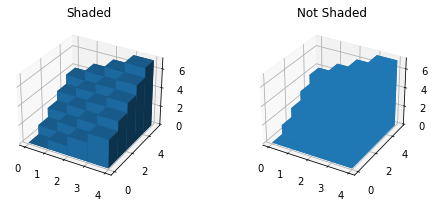

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# set up the figure and axes
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# fake data
_x = np.arange(4)
_y = np.arange(5)
_xx, _yy = np.meshgrid(_x, _y)
print(_xx)
x, y = _xx.ravel(), _yy.ravel()
print(x, y)

top = x + y
print(top)
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded')

ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
ax2.set_title('Not Shaded')

plt.show()

In [30]:
with open('../crash_test_log.txt', 'r') as f:
    log = f.read()

log

'[INFO] : nclerks: 5, nservers: 5, unreliable: false, dnsDuration: 20, crash: true\nStart ...\nStart ...\nUDP server (clerk 0) listening on :9876...\nUDP server (clerk 3) listening on :9879...\nUDP server (clerk 4) listening on :9880...\nUDP server (clerk 1) listening on :9877...\nUDP server (clerk 2) listening on :9878...\nshutdown server 4, time: 2024-05-04 18:36:55.315590233 +0800 CST m=+1.023977007\nshutdown server 3, time: 2024-05-04 18:36:55.384858632 +0800 CST m=+1.093245402\nstart server 4, time: 2024-05-04 18:36:56.425673702 +0800 CST m=+2.134060474\nstart server 3, time: 2024-05-04 18:36:56.658181255 +0800 CST m=+2.366568037\nshutdown server 0, time: 2024-05-04 18:36:57.565936237 +0800 CST m=+3.274323011\nshutdown server 2, time: 2024-05-04 18:36:57.59742633 +0800 CST m=+3.305813104\nstart server 0, time: 2024-05-04 18:36:58.728225369 +0800 CST m=+4.436612141\nshutdown server 4, time: 2024-05-04 18:36:58.760183221 +0800 CST m=+4.468569993\nstart server 2, time: 2024-05-04 18:

In [31]:
pattern = r'server (\d+).*?m\=\+(\d+\.\d+)'

import re, itertools

OFFSET = 0.

data = re.findall(pattern, log, re.DOTALL)

# Sort the data by the server id
sorted_data = sorted(data, key=lambda x: x[0])

# Group the sorted data by the server id
grouped_data = itertools.groupby(sorted_data, key=lambda x: x[0])

# Save the grouped data to a dictionary (server_id: [list of values])
server_data = {k: [float(v)-OFFSET for _, v in g] for k, g in grouped_data}

# server_data

Text(0.5, 1.0, 'Failure periods of each server')

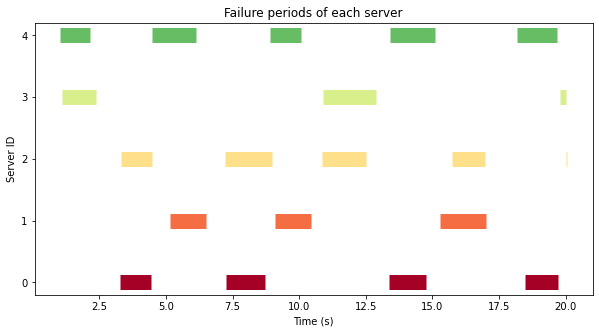

In [32]:
# Plot the operation periods of each server

fig, ax = plt.subplots(figsize=(10, 5))

for server_id, data in server_data.items():
    data = data + [20] if len(data) % 2 == 1 else data
    server_id = int(server_id)

    cmap = plt.get_cmap('RdYlGn')

    for i in range(0, len(data), 2):
        ax.plot([data[i], data[i+1]], [server_id, server_id], c=cmap(0.2 * server_id), linewidth=15, solid_capstyle='butt')

ax.set_yticks([float(x) for x in server_data.keys()])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Server ID')
ax.set_title('Failure periods of each server')